In [2]:
import pandas as pd
import urllib.request
import numpy as np 
# !conda install -c conda-forge geocoder --yes
# !conda install -c conda-forge geopy
# import geocoder
#import geopy
from geopy.distance import geodesic

In [3]:
df_wi = pd.read_csv('https://raw.githubusercontent.com/jrussellphd/IBM_capstone/master/us-zip-code-latitude-and-longitude.csv')

df_wi.head()

,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
0,53031,Hingham,WI,43.639395,-87.915705,-6,1,43.639395
1,53171,Somers,WI,42.642298,-87.903161,-6,1,42.642298
2,53189,Waukesha,WI,42.967394,-88.264000,-6,1,42.967394
3,53014,Chilton,WI,44.033215,-88.176260,-6,1,44.033215
4,54020,Osceola,WI,45.299735,-92.642220,-6,1,45.299735


In [4]:
df_mn = pd.read_csv('https://raw.githubusercontent.com/jrussellphd/IBM_capstone/master/us-zip-code-latitude-and-longitude%20MN.csv')

df_mn.head()

,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
0,56171,Sherburn,MN,43.660847,-94.74357,-6,1,43.660847
1,55302,Annandale,MN,45.246631,-94.11692,-6,1,45.246631
2,55992,Zumbrota,MN,44.297157,-92.68312,-6,1,44.297157
3,56517,Beltrami,MN,47.551710,-96.53492,-6,1,47.551710
4,56091,Waldorf,MN,43.930363,-93.69492,-6,1,43.930363


In [5]:
import random 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


## Dstribution of zipe codes across the state with simple scatter plot
## Hard to tell where zipe codes are more densly located and where more sparce

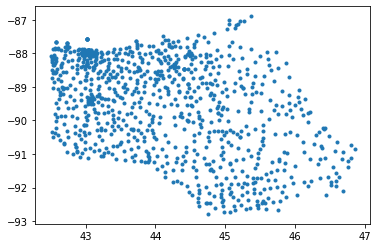

In [6]:
X = df_wi[['Latitude', 'Longitude']]
plt.scatter(X['Latitude'], X['Longitude'], marker='.')

## We can use K-means clustering on just latitudes and longtitudes to see if zipe codes follow a pattern
## K-means separates zip codes evenly by geography, not by density
## See that one cluster is twice the size of the other two cluster
## This larger cluster includes both Madison and Milwaukee

In [7]:
k_means = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)
k_means.fit(X)
y_kmeans = k_means.predict(X)
k_means_labels = k_means.labels_
k_means_labels

k_means_cluster_centers = k_means.cluster_centers_
print(k_means_cluster_centers)

[[ 43.8013147  -88.29622818]
 [ 45.39333522 -91.25296051]
 [ 43.42228107 -89.96492079]]


In [8]:
(unique, counts) = np.unique(k_means_labels, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

[[  0 431]
 [  1 243]
 [  2 266]]


## Zip codes plotted by cluster. Easy to see that algorithm made geographically even clusters.
## Clusters are not defined by how many zip codes (count) in each cluster

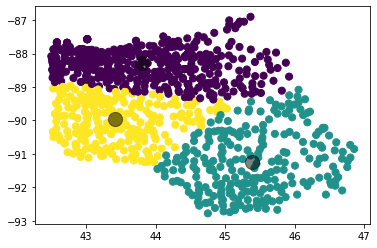

In [9]:
plt.scatter(X['Latitude'], X['Longitude'], c=y_kmeans, s=50, cmap='viridis')
centers = k_means_cluster_centers
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

## Import folium and get set up

In [10]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
from IPython.display import Image 
from IPython.core.display import HTML 

# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

# !conda install -c conda-forge folium=0.5.0 --yes   ## install if necesary 
import folium # plotting library


## Initialize folium map and plot Wisconsin zip codes on it
## This map makes it easier to see that Madison/Dane County and 
## Milwaukee have a concentration of zip codes relative to other 
## parts of the state

In [11]:
venues_map = folium.Map(location=[43.7844 , -88.7879], zoom_start=7)


for lat, lng, label in zip(df_wi.Latitude, df_wi.Longitude, df_wi.City):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='lightblue',
        popup=label,
        fill = True,
        fill_color='lightgreen',
        fill_opacity=0.5
    ).add_to(venues_map)

# display map
venues_map

## Setting up Foursquare

In [12]:
CLIENT_ID = 'DTCSBRDEARI5YPHBKTHXXHA2SKQKS0FEOQK0J2L13MQ3T2VE' # your Foursquare ID
CLIENT_SECRET = 'KK20BPB5FXZTBKFIWE0MXLJUS4A3QDZDKK1TY13PHOKDH5DI' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: DTCSBRDEARI5YPHBKTHXXHA2SKQKS0FEOQK0J2L13MQ3T2VE
CLIENT_SECRET:KK20BPB5FXZTBKFIWE0MXLJUS4A3QDZDKK1TY13PHOKDH5DI


## Select only the Milwaukee zip codes

In [13]:
df_milwaukee = df_wi[df_wi['City'].str.contains('Milwaukee')]
df_milwaukee.reset_index(drop= True, inplace = True)
df_milwaukee.head()

,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
0,53208,Milwaukee,WI,43.047863,-87.96618,-6,1,43.047863
1,53206,Milwaukee,WI,43.076179,-87.93476,-6,1,43.076179
2,53224,Milwaukee,WI,43.153865,-88.04032,-6,1,43.153865
3,53207,Milwaukee,WI,42.985465,-87.89998,-6,1,42.985465
4,53217,Milwaukee,WI,43.143510,-87.90894,-6,1,43.143510


## Set up search Foursquare query

In [14]:
search_query = 'Laundry'
radius = 5000
latitude = 43.0389
longitude =  -87.9065

In [15]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=DTCSBRDEARI5YPHBKTHXXHA2SKQKS0FEOQK0J2L13MQ3T2VE&client_secret=KK20BPB5FXZTBKFIWE0MXLJUS4A3QDZDKK1TY13PHOKDH5DI&ll=43.0389,-87.9065&v=20180604&query=Laundry&radius=5000&limit=100'

## Query results as json 

In [16]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ee38549f89b1820a6c7e28a'},
 'response': {'venues': [{'id': '4e108e7d7d8b4d5613d2a95c',
    'name': 'City Hall Square Laundry Room',
    'location': {'lat': 43.04014536420271,
     'lng': -87.9107609000337,
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.04014536420271,
       'lng': -87.9107609000337}],
     'distance': 373,
     'cc': 'US',
     'city': 'Milwaukee',
     'state': 'WI',
     'country': 'United States',
     'formattedAddress': ['Milwaukee, WI', 'United States']},
    'categories': [{'id': '4bf58dd8d48988d1fc941735',
      'name': 'Laundry Service',
      'pluralName': 'Laundry Services',
      'shortName': 'Laundry',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/laundry_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1591968873',
    'hasPerk': False},
   {'id': '4f80e1dae4b042dc213d6fd6',
    'name': 'JVG Laundry Room',
    'location': {'address': 'Jefferson',
     

## Convert json file to pandas dataframe

In [17]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


,id,name,categories,referralId,hasPerk,location.lat,location.lng,location.labeledLatLngs,location.distance,location.cc,location.city,location.state,location.country,location.formattedAddress,location.address,location.crossStreet,location.postalCode,venuePage.id
0,4e108e7d7d8b4d5613d2a95c,City Hall Square Laundry Room,"[{'id': '4bf58dd8d48988d1fc941735', 'name': 'L...",v-1591968873,False,43.040145,-87.910761,"[{'label': 'display', 'lat': 43.04014536420271...",373,US,Milwaukee,WI,United States,"[Milwaukee, WI, United States]",NaN,NaN,NaN,NaN
1,4f80e1dae4b042dc213d6fd6,JVG Laundry Room,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",v-1591968873,False,43.047687,-87.905751,"[{'label': 'display', 'lat': 43.04768657543590...",980,US,Milwaukee,WI,United States,"[Jefferson (Ogden), Milwaukee, WI 53202, Unite...",Jefferson,Ogden,53202,NaN
2,4b92f526f964a520702a34e3,Coin Laundry,"[{'id': '4bf58dd8d48988d1fc941735', 'name': 'L...",v-1591968873,False,43.053188,-87.898415,"[{'label': 'entrance', 'lat': 43.053079, 'lng'...",1721,US,Milwaukee,WI,United States,"[1701 N Humboldt Ave (at Brady St.), Milwaukee...",1701 N Humboldt Ave,at Brady St.,53202,NaN
3,4bc79b508b7c9c74adcd36cf,Marquette Tanning & Laundry,"[{'id': '4d1cf8421a97d635ce361c31', 'name': 'T...",v-1591968873,False,43.040577,-87.932976,"[{'label': 'display', 'lat': 43.04057667860513...",2162,US,Milwaukee,WI,United States,"[811 N 16th St (at Wells), Milwaukee, WI 53233...",811 N 16th St,at Wells,53233,NaN
4,4ae30936f964a520079021e3,East Side Maytag Coin Laundry,"[{'id': '4bf58dd8d48988d1fc941735', 'name': 'L...",v-1591968873,False,43.058270,-87.884900,"[{'label': 'display', 'lat': 43.05827, 'lng': ...",2781,US,Milwaukee,WI,United States,"[2009 E Kenilworth Pl (at N Prospect Ave.), Mi...",2009 E Kenilworth Pl,at N Prospect Ave.,53202,100808707


## Clean up data frame

In [18]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,lat,lng,labeledLatLngs,distance,cc,city,state,country,formattedAddress,address,crossStreet,postalCode,id
0,City Hall Square Laundry Room,Laundry Service,43.040145,-87.910761,"[{'label': 'display', 'lat': 43.04014536420271...",373,US,Milwaukee,WI,United States,"[Milwaukee, WI, United States]",NaN,NaN,NaN,4e108e7d7d8b4d5613d2a95c
1,JVG Laundry Room,Residential Building (Apartment / Condo),43.047687,-87.905751,"[{'label': 'display', 'lat': 43.04768657543590...",980,US,Milwaukee,WI,United States,"[Jefferson (Ogden), Milwaukee, WI 53202, Unite...",Jefferson,Ogden,53202,4f80e1dae4b042dc213d6fd6
2,Coin Laundry,Laundry Service,43.053188,-87.898415,"[{'label': 'entrance', 'lat': 43.053079, 'lng'...",1721,US,Milwaukee,WI,United States,"[1701 N Humboldt Ave (at Brady St.), Milwaukee...",1701 N Humboldt Ave,at Brady St.,53202,4b92f526f964a520702a34e3
3,Marquette Tanning & Laundry,Tanning Salon,43.040577,-87.932976,"[{'label': 'display', 'lat': 43.04057667860513...",2162,US,Milwaukee,WI,United States,"[811 N 16th St (at Wells), Milwaukee, WI 53233...",811 N 16th St,at Wells,53233,4bc79b508b7c9c74adcd36cf
4,East Side Maytag Coin Laundry,Laundry Service,43.058270,-87.884900,"[{'label': 'display', 'lat': 43.05827, 'lng': ...",2781,US,Milwaukee,WI,United States,"[2009 E Kenilworth Pl (at N Prospect Ave.), Mi...",2009 E Kenilworth Pl,at N Prospect Ave.,53202,4ae30936f964a520079021e3
5,JVT Laundry Room,Laundry Service,43.044060,-87.905094,"[{'label': 'display', 'lat': 43.04406012906676...",585,US,Milwaukee,WI,United States,"[Milwaukee, WI 53202, United States]",NaN,NaN,53202,4fe4546ae4b04d21c31bb422
6,Yankee Hill Laundry Room,Laundromat,43.044093,-87.903710,"[{'label': 'display', 'lat': 43.04409305194955...",621,US,Milwaukee,WI,United States,"[Milwaukee, WI, United States]",NaN,NaN,NaN,554e78e8498ee17d5aaeb58f
7,Plaza Hotel and Apartments Laundry,Laundry Service,43.044475,-87.902519,"[{'label': 'display', 'lat': 43.044475, 'lng':...",700,US,Milwaukee,WI,United States,"[1007 N Cass St (State St), Milwaukee, WI 5320...",1007 N Cass St,State St,53202,5589cad0498ed8424080402c
8,Cass Street Laundry Room,Laundry Service,43.046606,-87.901746,"[{'label': 'display', 'lat': 43.04660596768212...",940,US,Milwaukee,WI,United States,"[Cass St, Milwaukee, WI 53202, United States]",Cass St,NaN,53202,4f4195f9e4b0f960372f2655
9,Laundry Room,Residential Building (Apartment / Condo),43.022124,-87.911949,"[{'label': 'display', 'lat': 43.02212449732655...",1919,US,Milwaukee,WI,United States,"[Milwaukee, WI, United States]",NaN,NaN,NaN,51fa95ed498e49825effda12


In [19]:
laundry_ll = dataframe_filtered[['lat', 'lng']]
laundry_ll.head()

,lat,lng
0,43.040145,-87.910761
1,43.047687,-87.905751
2,43.053188,-87.898415
3,43.040577,-87.932976
4,43.058270,-87.884900


In [20]:
laundry_map = folium.Map(location=[43.0389 , -87.9065], zoom_start=12)


for lat, lng in zip(laundry_ll.lat, laundry_ll.lng):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.5
    ).add_to(laundry_map)

# display map
laundry_map



In [34]:
import math

x = 0.0
y = 0.0
z = 0.0

for i, coord in laundry_ll.iterrows():
    latitude = math.radians(coord.lat)
    longitude = math.radians(coord.lng)

    x += math.cos(latitude) * math.cos(longitude)
    y += math.cos(latitude) * math.sin(longitude)
    z += math.sin(latitude)

total = len(laundry_ll)

x = x / total
y = y / total
z = z / total

central_longitude = math.atan2(y, x)
central_square_root = math.sqrt(x * x + y * y)
central_latitude = math.atan2(z, central_square_root)

mean_location = {
    'latitude': math.degrees(central_latitude),
    'longitude': math.degrees(central_longitude)
    }

print(mean_location)
laundry_center_lat = math.degrees(central_latitude)
laundry_center_lng = math.degrees(central_longitude)
print(laundry_center_lat)
print(laundry_center_lng)

{'latitude': 43.04067405714463, 'longitude': -87.91121199326979}
43.04067405714463
-87.91121199326979


In [158]:

from math import sin, cos, sqrt, atan2, radians

# approximate radius of earth in km
R = 6373.0

dataframe_filtered.distance = 0

for i, row in dataframe_filtered.iterrows():
    lat1 = radians(dataframe_filtered.lat[i])
    lon1 = radians(dataframe_filtered.lng[i])
    lat2 = radians(math.degrees(central_latitude))
    lon2 = radians(math.degrees(central_longitude))
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    dataframe_filtered.distance[i] = (R * c)*1000


    
    

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [22]:
dataframe_filtered.head(20)

,name,categories,lat,lng,labeledLatLngs,distance,cc,city,state,country,formattedAddress,address,crossStreet,postalCode,id
0,City Hall Square Laundry Room,Laundry Service,43.040145,-87.910761,"[{'label': 'display', 'lat': 43.04014536420271...",373,US,Milwaukee,WI,United States,"[Milwaukee, WI, United States]",NaN,NaN,NaN,4e108e7d7d8b4d5613d2a95c
1,JVG Laundry Room,Residential Building (Apartment / Condo),43.047687,-87.905751,"[{'label': 'display', 'lat': 43.04768657543590...",980,US,Milwaukee,WI,United States,"[Jefferson (Ogden), Milwaukee, WI 53202, Unite...",Jefferson,Ogden,53202,4f80e1dae4b042dc213d6fd6
2,Coin Laundry,Laundry Service,43.053188,-87.898415,"[{'label': 'entrance', 'lat': 43.053079, 'lng'...",1721,US,Milwaukee,WI,United States,"[1701 N Humboldt Ave (at Brady St.), Milwaukee...",1701 N Humboldt Ave,at Brady St.,53202,4b92f526f964a520702a34e3
3,Marquette Tanning & Laundry,Tanning Salon,43.040577,-87.932976,"[{'label': 'display', 'lat': 43.04057667860513...",2162,US,Milwaukee,WI,United States,"[811 N 16th St (at Wells), Milwaukee, WI 53233...",811 N 16th St,at Wells,53233,4bc79b508b7c9c74adcd36cf
4,East Side Maytag Coin Laundry,Laundry Service,43.058270,-87.884900,"[{'label': 'display', 'lat': 43.05827, 'lng': ...",2781,US,Milwaukee,WI,United States,"[2009 E Kenilworth Pl (at N Prospect Ave.), Mi...",2009 E Kenilworth Pl,at N Prospect Ave.,53202,4ae30936f964a520079021e3
5,JVT Laundry Room,Laundry Service,43.044060,-87.905094,"[{'label': 'display', 'lat': 43.04406012906676...",585,US,Milwaukee,WI,United States,"[Milwaukee, WI 53202, United States]",NaN,NaN,53202,4fe4546ae4b04d21c31bb422
6,Yankee Hill Laundry Room,Laundromat,43.044093,-87.903710,"[{'label': 'display', 'lat': 43.04409305194955...",621,US,Milwaukee,WI,United States,"[Milwaukee, WI, United States]",NaN,NaN,NaN,554e78e8498ee17d5aaeb58f
7,Plaza Hotel and Apartments Laundry,Laundry Service,43.044475,-87.902519,"[{'label': 'display', 'lat': 43.044475, 'lng':...",700,US,Milwaukee,WI,United States,"[1007 N Cass St (State St), Milwaukee, WI 5320...",1007 N Cass St,State St,53202,5589cad0498ed8424080402c
8,Cass Street Laundry Room,Laundry Service,43.046606,-87.901746,"[{'label': 'display', 'lat': 43.04660596768212...",940,US,Milwaukee,WI,United States,"[Cass St, Milwaukee, WI 53202, United States]",Cass St,NaN,53202,4f4195f9e4b0f960372f2655
9,Laundry Room,Residential Building (Apartment / Condo),43.022124,-87.911949,"[{'label': 'display', 'lat': 43.02212449732655...",1919,US,Milwaukee,WI,United States,"[Milwaukee, WI, United States]",NaN,NaN,NaN,51fa95ed498e49825effda12


In [23]:
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

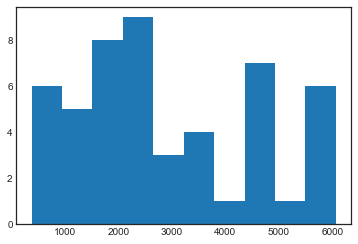

In [24]:
x = dataframe_filtered['distance']
plt.hist(x, bins = 10)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


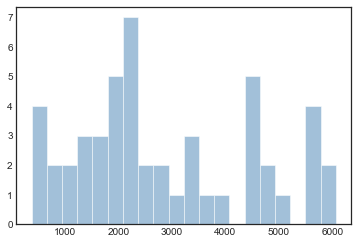

In [25]:
plt.hist(x, bins=20, normed=False, alpha=0.5,
          color='steelblue',
         edgecolor='white');

In [26]:
from scipy.stats import median_absolute_deviation
from scipy import stats 
mn = (x.mean())
med = (x.median())
St_Dev = np.around(x.std())
MAD = np.around(median_absolute_deviation(x))
IQR = np.around(stats.iqr(x, interpolation = 'midpoint'))
print('Mean =', mn)
print('Median = ', med)
print('Standard Deviation =', St_Dev)
print('Median Absolute Deviation =', MAD)
print('Inter-Quartile Range =', IQR)

Mean = 2871.54
Median =  2211.5
Standard Deviation = 1656.0
Median Absolute Deviation = 1793.0
Inter-Quartile Range = 2659.0


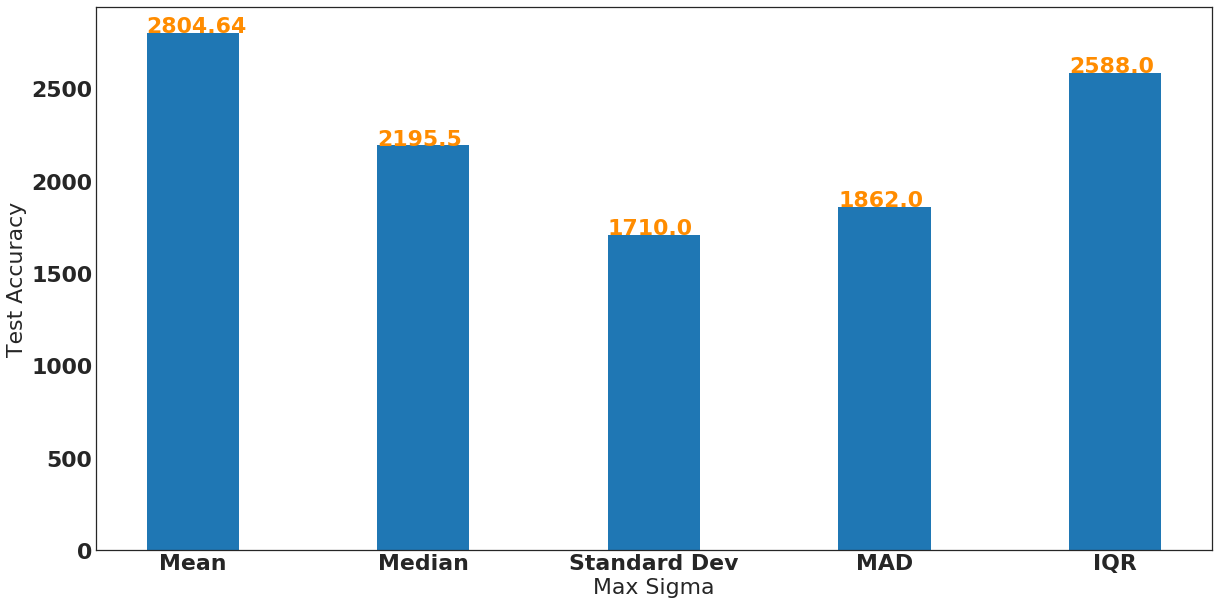

In [232]:
plt.figure(figsize=(20,10)) 
bars = plt.bar(measures, height=values, width=.4)

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rcParams['text.color'] = 'darkorange'

matplotlib.rc('font', **font)

measures = ('Mean', "Median", "Standard Dev", "MAD", "IQR")
values = (mn, med, St_Dev, MAD, IQR)

xlocs, xlabs = plt.xticks()

# reference x so you don't need to change the range each time x changes
xlocs=[i for i in measures]
xlabs=[i for i in measures]

plt.xlabel('Measures of Central Tendency and Dispersion')
plt.ylabel('Distance from Center')
plt.xticks(xlocs, xlabs)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)

plt.show()

In [92]:
m = folium.Map([laundry_center_lat, laundry_center_lng], zoom_start=14)

for lat, lng in zip(laundry_ll.lat, laundry_ll.lng):
    p1 = [laundry_center_lat, laundry_center_lng]
    p2 = [lat, lng]
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='gold',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.5
        ).add_to(m)

for lat, lng in zip(laundry_ll.lat, laundry_ll.lng):
    p1 = [laundry_center_lat, laundry_center_lng]
    p2 = [lat, lng]
    folium.PolyLine(locations=[p1, p2], color='sandybrown').add_to(m)

folium.features.CircleMarker([laundry_center_lat, laundry_center_lng], color = 'royalblue', radius = 12, fill_opacity = .2).add_to(m)


    
# display map
m